In [2]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import basicMCMC

In [3]:
df = basicMCMC.readCSV()
graph = basicMCMC.buildAttackGraph(df)
attackPR = basicMCMC.pagerank(graph)

In [4]:
attackPR

array([0.0238685 , 0.05422564, 0.04692921, 0.02235459, 0.09214996,
       0.06710879, 0.07387665, 0.05600747, 0.06500097, 0.0536509 ,
       0.07907376, 0.05661636, 0.08747568, 0.0340825 , 0.03928258,
       0.05360596, 0.04642334, 0.04826714])

In [5]:
def createDict(pr):
    types = ['Normal','Fire','Water','Electric','Grass','Ice',
        'Fighting','Poison','Ground','Flying','Psychic','Bug',
        'Rock','Ghost','Dragon','Dark','Steel','Fairy']
    
    prDict = {}
    for i, type in enumerate(types):
        prDict[type] = pr[i]
    return prDict

attack = createDict(attackPR)

In [20]:
def plot(prDict, num=18):
    plt.figure(figsize=(20,10))
    plt.bar(np.arange(num), prDict.values(), align='center', alpha=1.0)
    plt.xticks(np.arange(num), prDict.keys())
    plt.ylabel('PR Probability')
    plt.xlabel('Pokemon Type')
    plt.title('Pokemon Type PR')
    plt.show()

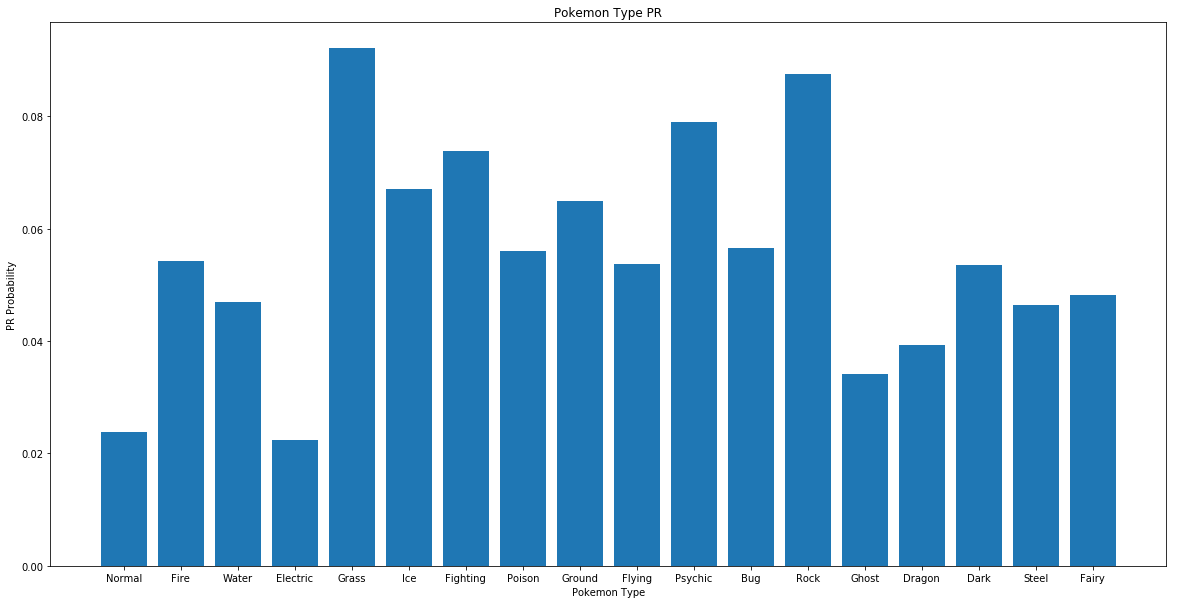

In [7]:
plot(attack)

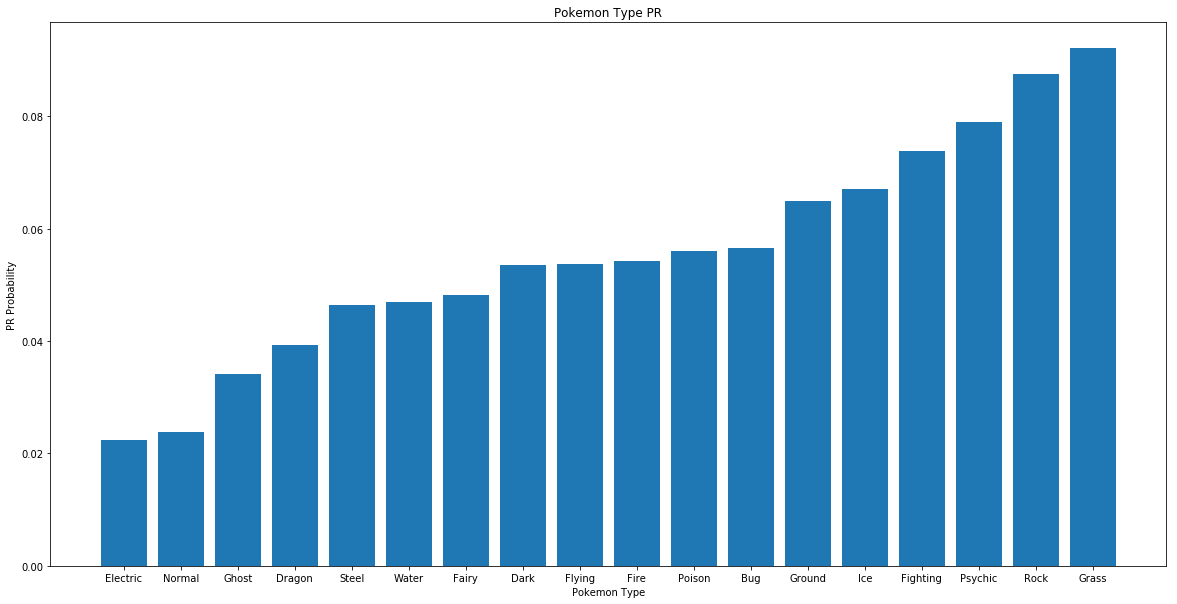

In [8]:
sortedAttack = sorted(attack.items(), key=lambda x: x[1])
sortedAttackDict = {}
for pair in sortedAttack:
    sortedAttackDict[pair[0]] = pair[1]

plot(sortedAttackDict)

In [9]:
defenseGraph = basicMCMC.buildDefendGraph(df)
defendPR = basicMCMC.pagerank(defenseGraph)
defendPR

array([0.03176998, 0.04220034, 0.04060872, 0.04060872, 0.09083361,
       0.03462008, 0.10077135, 0.0807181 , 0.07054833, 0.04904405,
       0.01594004, 0.11752555, 0.07451755, 0.05523661, 0.01594004,
       0.05145344, 0.0474203 , 0.04024318])

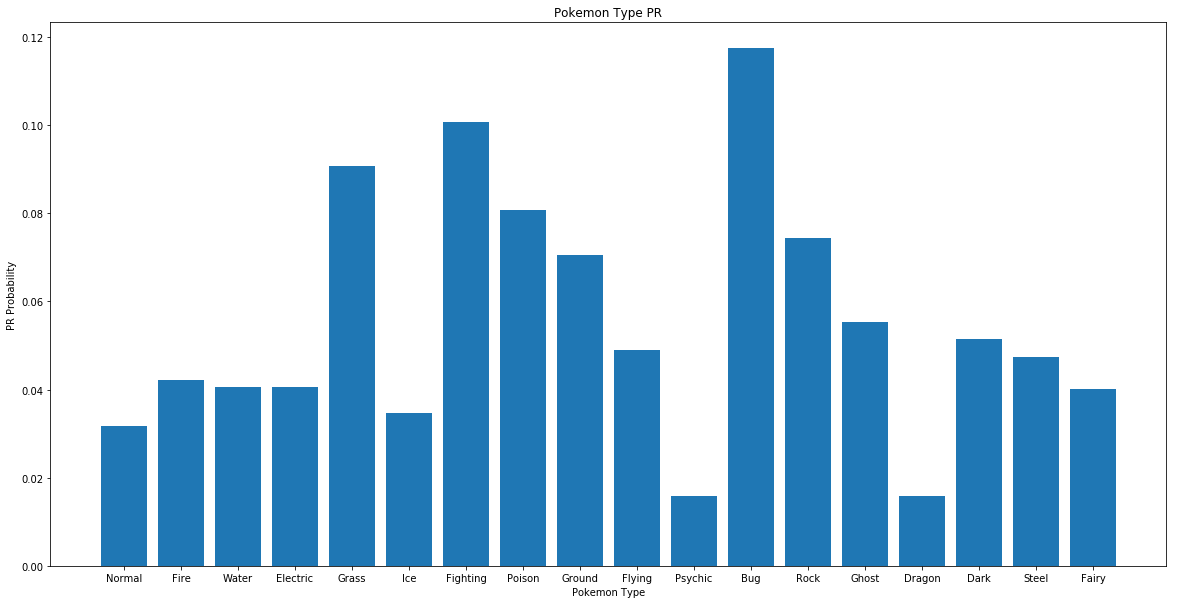

In [10]:
defend = createDict(defendPR)
plot(defend)

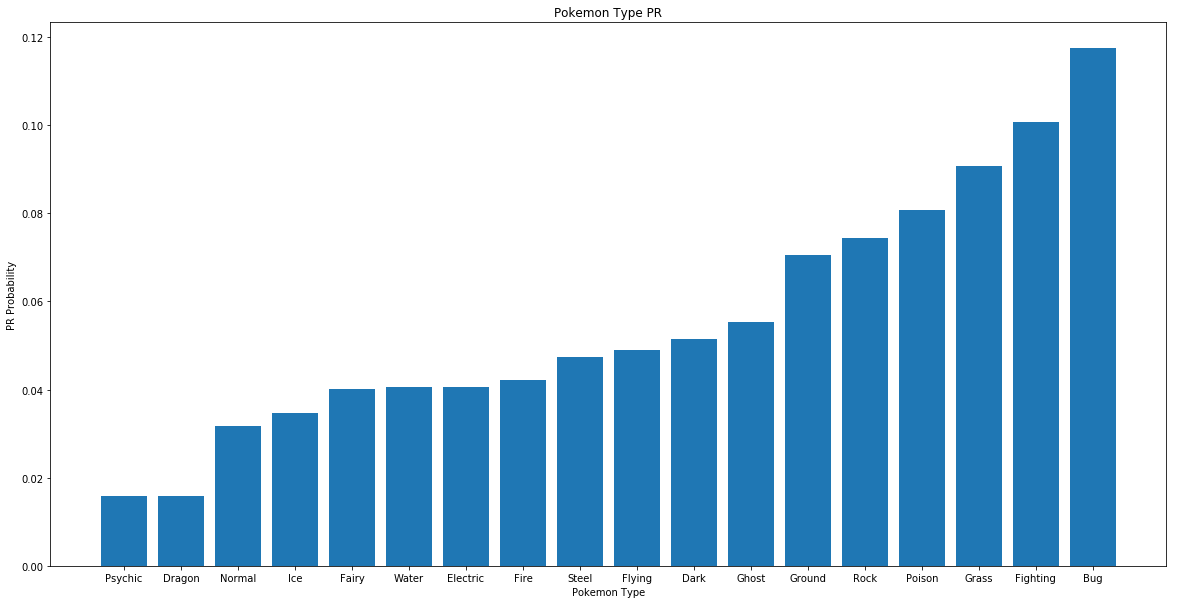

In [11]:
sortedDefend = sorted(defend.items(), key=lambda x: x[1])
sortedDefendDict = {}
for pair in sortedDefend:
    sortedDefendDict[pair[0]] = pair[1]

plot(sortedDefendDict)

In [12]:
import dualMCMC
dualDF = pd.read_csv('dualTyping.csv')

In [15]:
dualAttackGraph = dualMCMC.buildAttackGraph(dualDF)
dualAttackPR = dualMCMC.pagerank(dualAttackGraph)
dualAttackPR

array([0.00077495, 0.00077495, 0.00392938, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00254283, 0.00077495, 0.00077495,
       0.00275927, 0.00077495, 0.0040682 , 0.00077495, 0.00077495,
       0.00077495, 0.00344725, 0.00077495, 0.00410755, 0.0043628 ,
       0.00727688, 0.00077495, 0.00656702, 0.00660852, 0.00077495,
       0.00490584, 0.00841054, 0.00546367, 0.0060073 , 0.00077495,
       0.0064183 , 0.00596077, 0.00077495, 0.00077495, 0.00573953,
       0.00077495, 0.00077495, 0.00077495, 0.00441564, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00285806,
       0.0059043 , 0.00582827, 0.00298297, 0.00491706, 0.00561223,
       0.0061098 , 0.00422881, 0.0075872 , 0.00518535, 0.00472843,
       0.00077495, 0.0053182 , 0.00472276, 0.00077495, 0.00077495,
       0.00506661, 0.00516033, 0.00404641, 0.00077495, 0.00544

In [36]:
def dualTypeDict(pr):
    types = ['Normal','Fire','Water','Electric','Grass','Ice',
            'Fighting','Poison','Ground','Flying','Psychic','Bug',
            'Rock','Ghost','Dragon','Dark','Steel','Fairy']
    
    dualTypes = []
    for type1 in types:
        for type2 in types:
            dualTypes.append(type1+','+type2)

    typeMap = {}
    for i, type in enumerate(dualTypes):
        typeMap[type] = pr[i]
    return typeMap

dualAttackDict= dualTypeDict(dualAttackPR)

In [37]:
dualAttackDict

{'Normal,Normal': 0.0007749536913345548,
 'Normal,Fire': 0.0007749536913345548,
 'Normal,Water': 0.003929379486865259,
 'Normal,Electric': 0.0007749536913345548,
 'Normal,Grass': 0.0007749536913345548,
 'Normal,Ice': 0.0007749536913345548,
 'Normal,Fighting': 0.0007749536913345548,
 'Normal,Poison': 0.0025428301076663583,
 'Normal,Ground': 0.0007749536913345548,
 'Normal,Flying': 0.0007749536913345548,
 'Normal,Psychic': 0.002759271121006749,
 'Normal,Bug': 0.0007749536913345548,
 'Normal,Rock': 0.004068202385887463,
 'Normal,Ghost': 0.0007749536913345548,
 'Normal,Dragon': 0.0007749536913345548,
 'Normal,Dark': 0.0007749536913345548,
 'Normal,Steel': 0.003447254296252657,
 'Normal,Fairy': 0.0007749536913345548,
 'Fire,Normal': 0.004107550618932142,
 'Fire,Fire': 0.004362798424863612,
 'Fire,Water': 0.007276875302143521,
 'Fire,Electric': 0.0007749536913345548,
 'Fire,Grass': 0.006567017023804892,
 'Fire,Ice': 0.006608521754392096,
 'Fire,Fighting': 0.0007749536913345548,
 'Fire,Poison

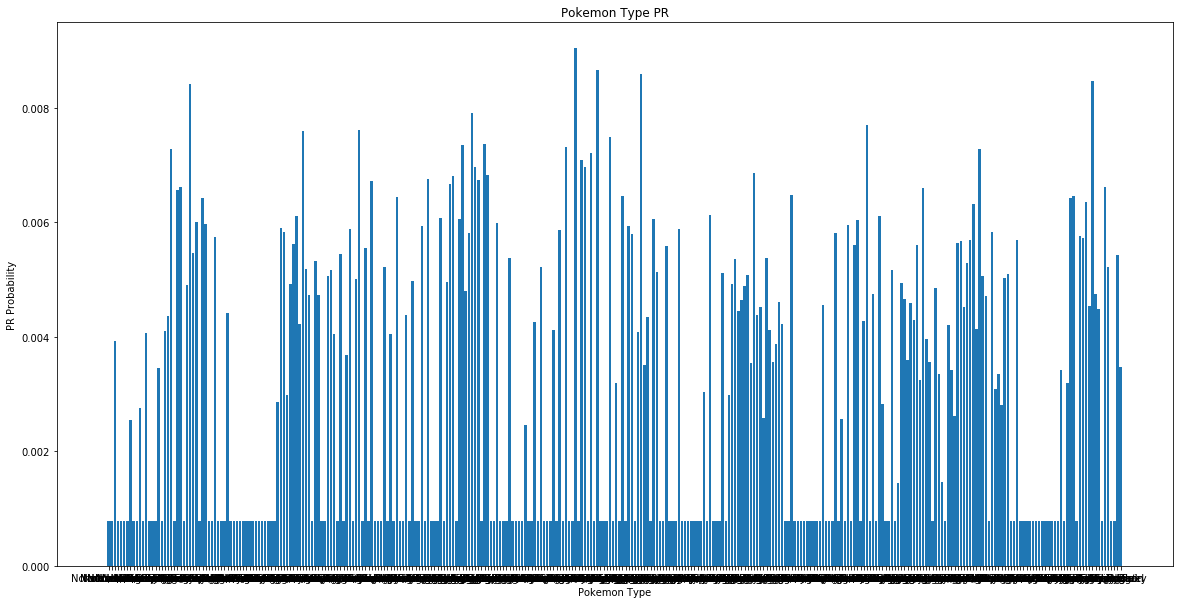

In [38]:
plot(dualAttackDict, num=18**2)

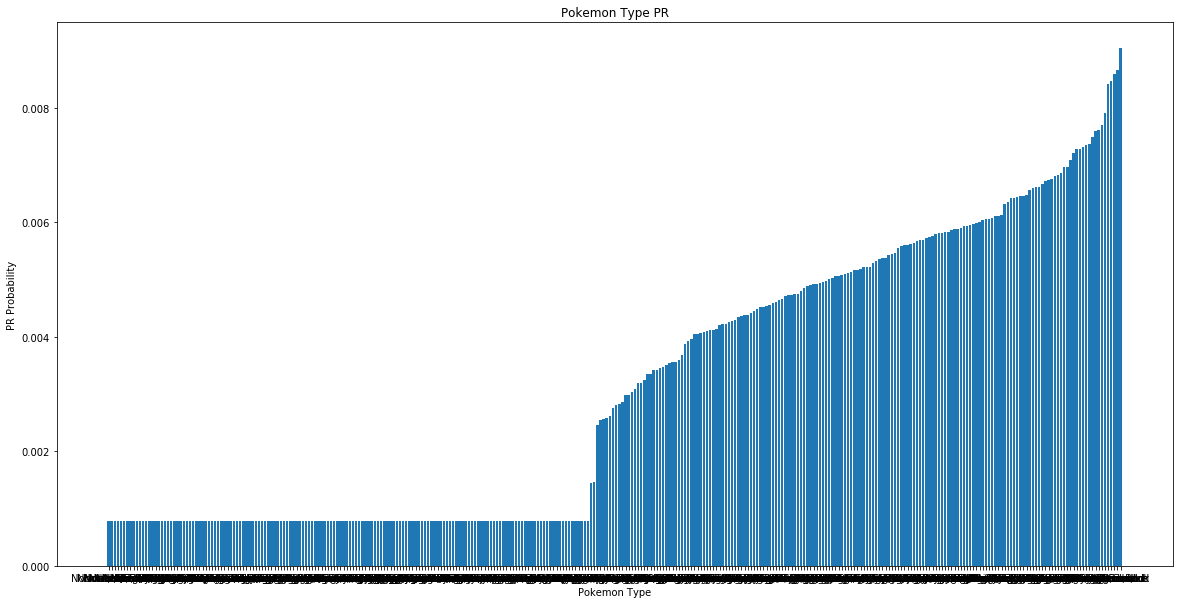

In [39]:
sortedDualAttack = sorted(dualAttackDict.items(), key=lambda x: x[1])
sortedDualAttackDict = {}
for pair in sortedDualAttack:
    sortedDualAttackDict[pair[0]] = pair[1]

plot(sortedDualAttackDict, num=18**2)

In [40]:
dualDefendGraph = dualMCMC.buildDefendGraph(dualDF)
dualDefendPR = dualMCMC.pagerank(dualDefendGraph)
dualDefendPR

array([0.00077495, 0.00077495, 0.00502428, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00518163, 0.00077495, 0.00077495,
       0.00292962, 0.00077495, 0.00462459, 0.00077495, 0.00077495,
       0.00077495, 0.00812044, 0.00077495, 0.00591368, 0.00479027,
       0.00648288, 0.00077495, 0.00707178, 0.00556442, 0.00077495,
       0.00658648, 0.00651779, 0.0056572 , 0.00678734, 0.00077495,
       0.00618585, 0.00568866, 0.00077495, 0.00077495, 0.00719094,
       0.00077495, 0.00077495, 0.00077495, 0.00465424, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00077495,
       0.00077495, 0.00077495, 0.00077495, 0.00077495, 0.00421083,
       0.00699217, 0.00663476, 0.00415191, 0.00633191, 0.00443965,
       0.0061108 , 0.00713686, 0.00482572, 0.00560393, 0.00566691,
       0.00077495, 0.00594456, 0.00502286, 0.00077495, 0.00077495,
       0.00823423, 0.00572222, 0.0048477 , 0.00077495, 0.00669

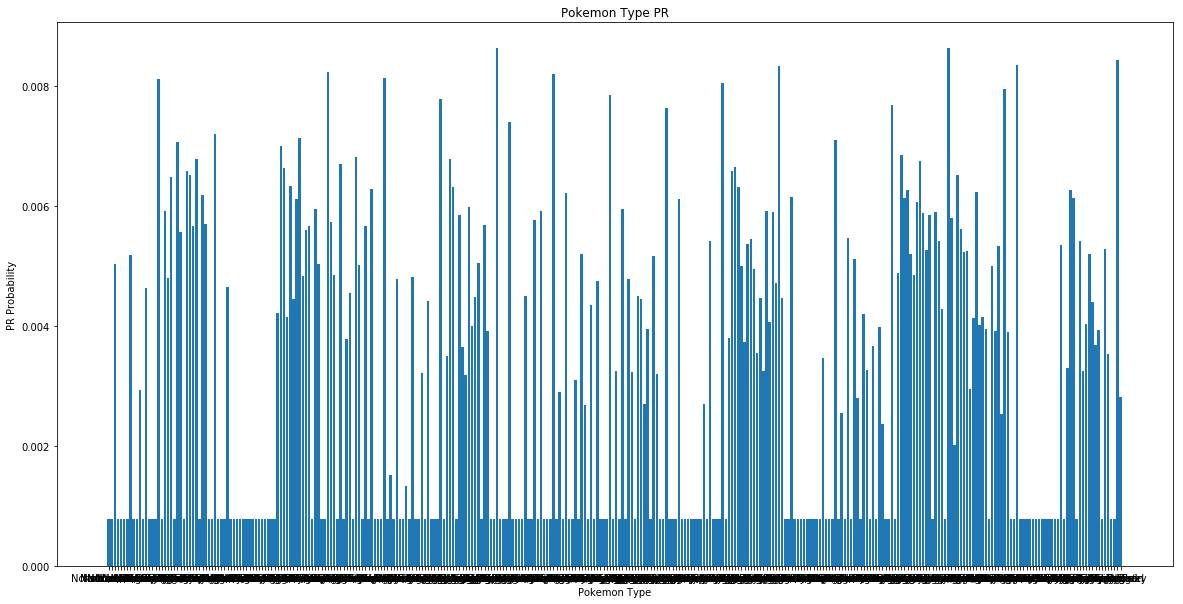

In [41]:
dualDefendDict= dualTypeDict(dualDefendPR)
plot(dualDefendDict, num=18**2)

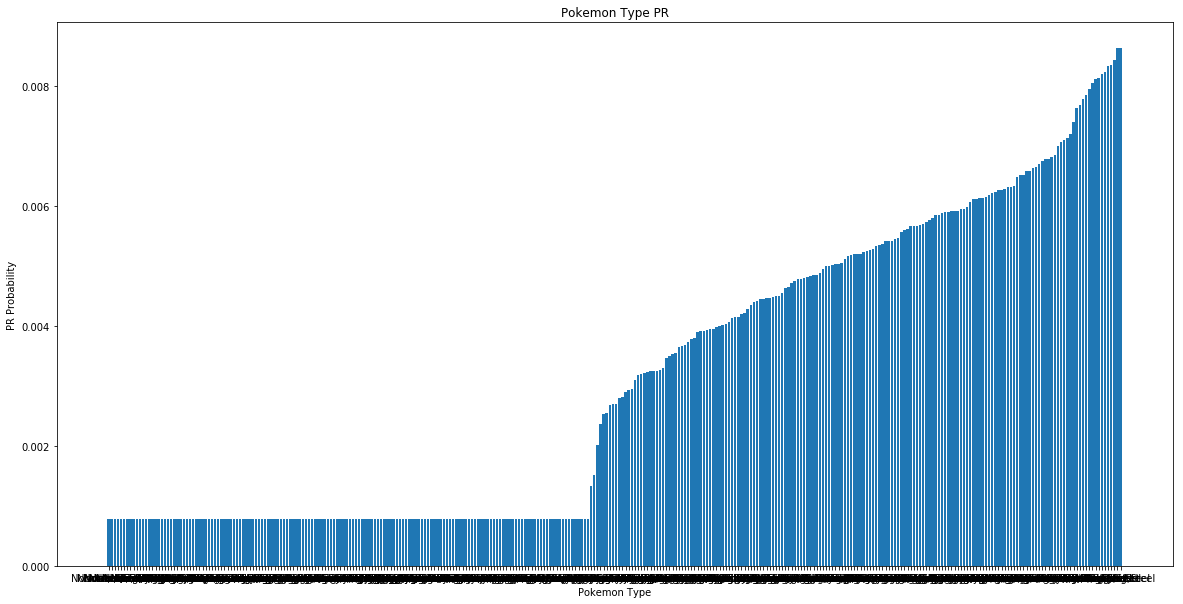

In [42]:
sortedDualDefend = sorted(dualDefendDict.items(), key=lambda x: x[1])
sortedDualDefendDict = {}
for pair in sortedDualDefend:
    sortedDualDefendDict[pair[0]] = pair[1]

plot(sortedDualDefendDict, num=18**2)

In [43]:
#Best Attacking Type
sortedDualAttack[len(sortedDualAttack)-1][0]

'Ground,Ice'

In [44]:
#Best Defending Type
sortedDualDefend[len(sortedDualDefend)-1][0]

'Fighting,Steel'

In [52]:
import seaborn as sns
%matplotlib inline

types = ['Normal','Fire','Water','Electric','Grass','Ice',
            'Fighting','Poison','Ground','Flying','Psychic','Bug',
            'Rock','Ghost','Dragon','Dark','Steel','Fairy']
dualDict = {}
otherDict = {}
for i, pokemonType in enumerate(types):
    otherDict[i] = pokemonType
    dualDict[pokemonType] = {}

dualAttackDF = pd.DataFrame(columns = types)
for key in dualAttackDict.keys():
    pokemon = key.split(',')
    dualDict[pokemon[0]][pokemon[1]] = dualAttackDict[key]

for key in dualDict.keys():
    dualAttackDF = dualAttackDF.append(dualDict[key],ignore_index=True)

dualAttackDF = dualAttackDF.rename(index=otherDict)    
dualAttackDF.head()

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,0.000775,0.000775,0.003929,0.000775,0.000775,0.000775,0.000775,0.002543,0.000775,0.000775,0.002759,0.000775,0.004068,0.000775,0.000775,0.000775,0.003447,0.000775
Fire,0.004108,0.004363,0.007277,0.000775,0.006567,0.006609,0.000775,0.004906,0.008411,0.005464,0.006007,0.000775,0.006418,0.005961,0.000775,0.000775,0.005740,0.000775
Water,0.000775,0.000775,0.004416,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775
Electric,0.002858,0.005904,0.005828,0.002983,0.004917,0.005612,0.006110,0.004229,0.007587,0.005185,0.004728,0.000775,0.005318,0.004723,0.000775,0.000775,0.005067,0.005160
Grass,0.004046,0.000775,0.005446,0.000775,0.003679,0.005875,0.000775,0.005015,0.007617,0.000775,0.005553,0.000775,0.006723,0.000775,0.000775,0.000775,0.005225,0.000775


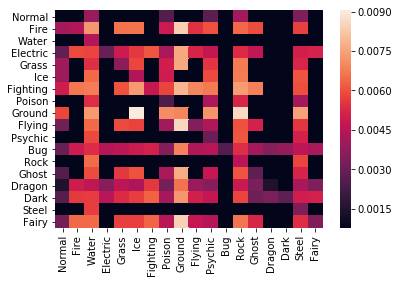

In [53]:
sns.heatmap(dualAttackDF)

In [57]:
types = ['Normal','Fire','Water','Electric','Grass','Ice',
            'Fighting','Poison','Ground','Flying','Psychic','Bug',
            'Rock','Ghost','Dragon','Dark','Steel','Fairy']
dualDict2 = {}
for i, pokemonType in enumerate(types):
    dualDict2[pokemonType] = {}

dualDefendDF = pd.DataFrame(columns = types)
for key in dualDefendDict.keys():
    pokemon = key.split(',')
    print(pokemon)
    dualDict2[pokemon[0]][pokemon[1]] = dualDefendDict[key]

for key in dualDict2.keys():
    dualDefendDF = dualDefendDF.append(dualDict2[key],ignore_index=True)

dualDefendDF = dualDefendDF.rename(index=otherDict)    
dualDefendDF.head()

['Normal', 'Normal']
['Normal', 'Fire']
['Normal', 'Water']
['Normal', 'Electric']
['Normal', 'Grass']
['Normal', 'Ice']
['Normal', 'Fighting']
['Normal', 'Poison']
['Normal', 'Ground']
['Normal', 'Flying']
['Normal', 'Psychic']
['Normal', 'Bug']
['Normal', 'Rock']
['Normal', 'Ghost']
['Normal', 'Dragon']
['Normal', 'Dark']
['Normal', 'Steel']
['Normal', 'Fairy']
['Fire', 'Normal']
['Fire', 'Fire']
['Fire', 'Water']
['Fire', 'Electric']
['Fire', 'Grass']
['Fire', 'Ice']
['Fire', 'Fighting']
['Fire', 'Poison']
['Fire', 'Ground']
['Fire', 'Flying']
['Fire', 'Psychic']
['Fire', 'Bug']
['Fire', 'Rock']
['Fire', 'Ghost']
['Fire', 'Dragon']
['Fire', 'Dark']
['Fire', 'Steel']
['Fire', 'Fairy']
['Water', 'Normal']
['Water', 'Fire']
['Water', 'Water']
['Water', 'Electric']
['Water', 'Grass']
['Water', 'Ice']
['Water', 'Fighting']
['Water', 'Poison']
['Water', 'Ground']
['Water', 'Flying']
['Water', 'Psychic']
['Water', 'Bug']
['Water', 'Rock']
['Water', 'Ghost']
['Water', 'Dragon']
['Water', 'D

IndexError: list index out of range

In [58]:
dualDefendDict

{'Normal,Normal': 0.0007749536913345542,
 'Normal,Fire': 0.0007749536913345542,
 'Normal,Water': 0.0050242845886627075,
 'Normal,Electric': 0.0007749536913345542,
 'Normal,Grass': 0.0007749536913345542,
 'Normal,Ice': 0.0007749536913345542,
 'Normal,Fighting': 0.0007749536913345542,
 'Normal,Poison': 0.0051816301531185825,
 'Normal,Ground': 0.0007749536913345542,
 'Normal,Flying': 0.0007749536913345542,
 'Normal,Psychic': 0.0029296197106163167,
 'Normal,Bug': 0.0007749536913345542,
 'Normal,Rock': 0.004624594307640501,
 'Normal,Ghost': 0.0007749536913345542,
 'Normal,Dragon': 0.0007749536913345542,
 'Normal,Dark': 0.0007749536913345542,
 'Normal,Steel': 0.00812043841028327,
 'Normal,Fairy': 0.0007749536913345542,
 'Fire,Normal': 0.005913681870790562,
 'Fire,Fire': 0.004790273843399477,
 'Fire,Water': 0.006482877209667409,
 'Fire,Electric': 0.0007749536913345542,
 'Fire,Grass': 0.007071779184853269,
 'Fire,Ice': 0.005564420586037415,
 'Fire,Fighting': 0.0007749536913345542,
 'Fire,Poiso